In [1]:
import logging

from dotenv import load_dotenv

from template_langgraph.loggers import get_logger

_ = load_dotenv(
    override=True,
    verbose=True,
)

logger = get_logger(__name__)
logger.setLevel(logging.DEBUG)

In [2]:
from uuid import uuid4

from template_langgraph.agents.image_classifier_agent.agent import ImageClassifierAgent
from template_langgraph.agents.image_classifier_agent.classifiers import (
    LlmClassifier,
)
from template_langgraph.agents.image_classifier_agent.models import (
    AgentInputState,
    AgentState,
    Results,
)

# Create an instance of the agent
graph = ImageClassifierAgent(
    classifier=LlmClassifier(),
).create_graph()

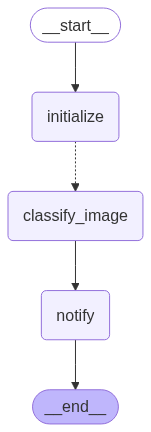

In [3]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
for event in graph.stream(
    input=AgentState(
        input=AgentInputState(
            prompt="この画像の中身を 3 行で日本語で説明してください",
            id=str(uuid4()),
            file_paths="../docs/images/fastapi.png,../docs/images/streamlit.png".split(","),
        ),
        results=[],
    )
):
    logger.info("-" * 20)
    logger.info(f"Event: {event}")

2025-08-14 11:46:12,891 [    INFO] Initializing state: input=AgentInputState(prompt='この画像の中身を 3 行で日本語で説明してください', id='dc32448d-5a52-4ad7-ba68-118b2e3c9d48', file_paths=['../docs/images/fastapi.png', '../docs/images/streamlit.png']) results=[] (agent.py:73)
2025-08-14 11:46:12,892 [    INFO] Running subtasks with state: input=AgentInputState(prompt='この画像の中身を 3 行で日本語で説明してください', id='dc32448d-5a52-4ad7-ba68-118b2e3c9d48', file_paths=['../docs/images/fastapi.png', '../docs/images/streamlit.png']) results=[] (agent.py:79)
2025-08-14 11:46:12,892 [    INFO] -------------------- (1747893361.py:11)
2025-08-14 11:46:12,893 [    INFO] Event: {'initialize': {'input': AgentInputState(prompt='この画像の中身を 3 行で日本語で説明してください', id='dc32448d-5a52-4ad7-ba68-118b2e3c9d48', file_paths=['../docs/images/fastapi.png', '../docs/images/streamlit.png']), 'results': []}} (1747893361.py:12)
2025-08-14 11:46:12,893 [    INFO] Classify file: ../docs/images/fastapi.png (agent.py:92)
2025-08-14 11:46:12,893 [    INFO] Class

In [5]:
results: list[Results] = event["notify"]["results"]
for result in results:
    print(f"{result.model_dump_json(indent=2)}")

{
  "file_path": "../docs/images/fastapi.png",
  "result": {
    "title": "Diagnostic Dashboard",
    "summary": "この画像には、KABUTOの起動中に発生する問題についてのトラブルシューティングガイドが表示されています。具体的には、画面の紫色の点滅とシステムのフリーズに関する問題が説明されています。解決策として\"Shinobi Protocol\"の初期化不具合について説明され、周辺機器を全て外してから再起動する方法が推奨されています。",
    "labels": [
      "KABUTO",
      "troubleshooting",
      "system freeze",
      "screen issue"
    ],
    "reliability": 0.95
  }
}
{
  "file_path": "../docs/images/streamlit.png",
  "result": {
    "title": "「KABUTO」と「検索ツール」",
    "summary": "このスクリーンショットはコンピュータプログラムのインターフェイスを示しています。ユーザーが「KABUTOについて教えて」と入力しており、その下に使用する検索ツールが表示されています。検索中のツールには「search_qdrant」と「search_elasticsearch」があります。",
    "labels": [
      "コンピュータプログラム",
      "インターフェイス",
      "検索ツール",
      "ユーザー入力",
      "検索エンジン"
    ],
    "reliability": 0.95
  }
}
